<h1> <center> METRO MANILA: COMMODITY PRICE CHECKER </center> </h1>

<h1 style="background-color: #3cb371; padding: 20px;"> <center> <span style="color:white">
<br> INSTALLATION
</span> </center> </h1>

In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima.utils import ndiffs

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None)

<h1 style="background-color: #ffa500; padding: 20px;"> <center> <span style="color:white">
<br> COMMODITY PICKER
</span> </center> </h1>

In [3]:
# FUNCTIONS: CHOOSING A SPECIFIC COMMODITY TYPE
def rice_group():    
    rice_type = int(input('''CHOOSE A COMMODITY GROUP:
[1] REGULAR-MILLED RICE    [3] PREMIUM RICE
[2] WELL-MILLED RICE       [4] SPECIAL RICE
'''))

    match (rice_type):
        case 1: # REGULAR-MILLED RICE
            commodity = 'Regular-Milled Rice'
            csv_path = '../csv/rice/regular_milled_rice.csv'
            p = 5
            d = 0
            q = 5
        case 2: # WELL-MILLED RICE
            commodity = 'Well-Milled Rice'
            csv_path = '../csv/rice/well_milled_rice.csv'
            p = 2
            d = 0
            q = 2
        case 3: # PREMIUM RICE
            commodity = 'Premium Rice'
            csv_path = '../csv/rice/premium_rice.csv'
            p = 9
            d = 0
            q = 9
        case 4: # SPECIAL RICE
            commodity = 'Special Rice'
            csv_path = '../csv/rice/special_rice.csv'
            p = 2
            d = 0
            q = 2

    return commodity, csv_path
    
def meat_group():    
    meat_type = int(input('''CHOOSE A COMMODITY GROUP:
[1] BEEF BRISKET           [4] PORK BELLY
[2] BEEF RUMP              [5] PORK HAM
[3] WHOLE CHICKEN
'''))

    match (meat_type):
        case 1: # BEEF BRISKET 
            commodity = 'Beef Brisket'
            csv_path = '../csv/meat/beef_brisket.csv'
            p = 3
            d = 1
            q = 3
        case 2: # BEEF RUMP
            commodity = 'Beef Rump'
            csv_path = '../csv/meat/beef_rump.csv'
            p = 9
            d = 0
            q = 9
        case 3: # WHOLE CHICKEN
            commodity = 'Whole Chicken'
            csv_path = '../csv/meat/whole_chicken.csv'
            p = 3
            d = 1
            q = 7
        case 4: # PORK BELLY
            commodity = 'Pork Belly'
            csv_path = '../csv/meat/pork_belly.csv'
            p = 4
            d = 1
            q = 5
        case 5: # PORK HAM
            commodity = 'Pork Kasim'
            csv_path = '../csv/meat/pork_kasim.csv'
            p = 2
            d = 1
            q = 5

    return commodity, csv_path
    
def fish_group():    
    fish_type = int(input('''CHOOSE A COMMODITY GROUP:
[1] ALUMAHAN               [3] GALUNGGONG
[2] BANGUS                 [4] TILAPIA
'''))

    match (fish_type):
        case 1: # ALUMAHAN
            commodity = 'Alumahan'
            csv_path = '../csv/fish/alumahan.csv'
            p = 3
            d = 1
            q = 6
        case 2: # BANGUS 
            commodity = 'Bangus'
            csv_path = '../csv/fish/bangus.csv'
            p = 5
            d = 1
            q = 5
        case 3: # GALUNGGONG
            commodity = 'Galunggong'
            csv_path = '../csv/fish/galunggong.csv'
            p = 3
            d = 1
            q = 5
        case 4: # TILAPIA
            commodity = 'Tilapia'
            csv_path = '../csv/fish/tilapia.csv'
            p = 1
            d = 0
            q = 1

    return commodity, csv_path

def fruits_group():   
    fruits_type = int(input('''CHOOSE A COMMODITY GROUP:
[1] BANANA (LAKATAN)       [4] MANGO
[2] BANANA (LATUNDAN)      [5] PAPAYA
[3] CALAMANSI
'''))

    match (fruits_type):
        case 1: # BANANA (LAKATAN)
            commodity = 'Banana (Lakatan)'
            csv_path = '../csv/fruits/banana_lakatan.csv'
            p = 3
            d = 1
            q = 3
        case 2: # BANANA (LATUNDAN) 
            commodity = 'Banana (Latundan)'
            csv_path = '../csv/fruits/banana_latundan.csv'
            p = 1
            d = 1
            q = 1
        case 3: # CALAMANSI
            commodity = 'Calamansi'
            csv_path = '../csv/fruits/calamansi.csv'
            p = 0
            d = 0
            q = 0
        case 4: # SPECIAL RICE
            commodity = 'Mango'
            csv_path = '../csv/fruits/mango.csv'
            p = 0
            d = 0
            q = 0
        case 5: # PAPAYA
            commodity = 'Papaya'
            csv_path = '../csv/fruits/papaya.csv'
            p = 0
            d = 0
            q = 0

    return commodity, csv_path

def vegetable_group():   
    vegetable_type = int(input('''CHOOSE A COMMODITY GROUP:
[1] CABBAGE                [4] TOMATO
[2] CARROTS                [5] POTATO
[3] EGGPLANT       
'''))

    match (vegetable_type):
        case 1: # CABBAGE 
            commodity = 'Cabbage'
            csv_path = '../csv/vegetables/cabbage.csv'
            p = 0
            d = 0
            q = 0
        case 2: # CARROTS
            commodity = 'Carrots'
            csv_path = '../csv/vegetables/carrots.csv'
            p = 0
            d = 0
            q = 0
        case 3: # EGGPLANT
            commodity = 'Eggplant'
            csv_path = '../csv/vegetables/eggplant.csv'
            p = 0
            d = 0
            q = 0   
        case 4: # TOMATO
            commodity = 'Tomato'
            csv_path = '../csv/vegetables/tomato.csv'
            p = 0
            d = 0
            q = 0
        case 5: # POTATO
            commodity = 'Potato'
            csv_path = '../csv/vegetables/white_potato.csv'
            p = 0
            d = 0
            q = 0

    return commodity, csv_path
    
def spices_group():   
    spices_type = int(input('''CHOOSE A COMMODITY GROUP:
[1] GARLIC               [2] ONION
'''))

    match (spices_type):
        case 1: # AMPALAYA  
            commodity = 'Garlic'
            csv_path = '../csv/spices/garlic.csv'
            p = 0
            d = 0
            q = 0
        case 2: # BAGUIO BEANS 
            commodity = 'Red Onion'
            csv_path = '../csv/spices/red_onion.csv'
            p = 0
            d = 0
            q = 0
            
    return commodity, csv_path

<h1 style="background-color: #54657e; padding: 20px;"> <center> <span style="color:white">
<br> ARIMA MODEL: PARAMETERS
</span> </center> </h1>

In [4]:
def ad_test(dataset):
        dftest = adfuller(dataset, autolag = 'AIC')
        print('1. ADF:', dftest[0])
        print('2. P-Value:', dftest[1])
        print('3. No. of Lags:', dftest[2])
        print('4. No. of Observations:', dftest[3])
        print('5. Critical Values:')
        for key, val in dftest[4].items():
            print('\t', key, ':', val) 

# ADF (Augmented Dickey Fuller): Get values of p, d, q for ARIMA model
def get_arima_params(df):
    # P-VALUE: PACF
    print('P-VALUE: PACF')
    diff = df['High'].diff().dropna()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    
    ax1.plot(diff)
    ax1.set_title('Difference Once')
    ax2.set_ylim(0, 1)
    plot_pacf(df['High'], ax=ax2);

    # Q-VALUE
    print('\n\nQ-VALUE: PACF')
    diff = df['High'].diff().dropna()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    
    ax1.plot(diff)
    ax1.set_title('Difference Once')
    ax2.set_ylim(0, 1)
    plot_acf(df['High'], ax=ax2);
    
    # Computing for the value of 'd' in ARIMA model
    print(f'\n\nD-value:', ndiffs(df['High'], test='adf'))

In [68]:
def ad_test(dataset):
        dftest = adfuller(dataset, autolag = 'AIC')
        print('1. ADF:', dftest[0])
        print('2. P-Value:', dftest[1])
        print('3. No. of Lags:', dftest[2])
        print('4. No. of Observations:', dftest[3])
        print('5. Critical Values:')
        for key, val in dftest[4].items():
            print('\t', key, ':', val) 

# ADF (Augmented Dickey Fuller): Get values of p, d, q for ARIMA model
def get_arima_params(df):
    # P-VALUE: PACF
    print('P-VALUE: PACF')
    diff = df['Low'].diff().dropna()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    
    ax1.plot(diff)
    ax1.set_title('Difference Once')
    ax2.set_ylim(0, 1)
    plot_pacf(df['Low'], ax=ax2);

    # Q-VALUE
    print('\n\nQ-VALUE: PACF')
    diff = df['Low'].diff().dropna()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    
    ax1.plot(diff)
    ax1.set_title('Difference Once')
    ax2.set_ylim(0, 1)
    plot_acf(df['Low'], ax=ax2);
    
    # Computing for the value of 'd' in ARIMA model
    print(f'\n\nD-value:', ndiffs(df['Low'], test='adf'))

<h1 style="background-color: #c24b5a; padding: 20px;"> <center> <span style="color:white">
<br> ARIMA: TESTING MODEL
</span> </center> </h1>

In [5]:
# FUNCTION: Training and testing the model on the training and testing data
def training_model(commodity, df, p, d, q):
    # Store the dataframe in a separate variable
    X = df
    
    # Split the dataset into training (X_train) and testing (X_test) sets
    X_train, X_test = train_test_split(X, test_size=0.2, shuffle=False)
    
    print(f'Training Set: {X_train.shape} \n Testing Set: {X_test.shape}')

    # Train the ARIMA model with the high prices of the training set
    # Use the values obntained from the ACF and PACF Test
    model = ARIMA(X_train['High'], order=(p, d, q))
    model = model.fit()

    # Run the prediction
    start = len(X_test)
    end = len(X_train) + len(X_test) - 1
    predict = model.predict(start=start, end=end, typ='levels')
    predict.index = df.index[start:end+1]

    # Plot the predicted values, and the actual values from the Test set
    predict.plot(legend=True)
    X_test['High'].plot(legend=True)
    
    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Metro Manila: {commodity} Price Prediction')
    
    # Add a legend
    plt.legend()

<h1 style="background-color: #5f665a; padding: 20px;"> <center> <span style="color:white">
<br> ARIMA: FULL DATASET
</span> </center> </h1>

In [6]:
# FUNCTION: Training and testing the model on the full dataset
def full_model(commodity, df, p, d, q):
    # Re-train the model on the entire dataset, then predict future prices
    model = ARIMA(df['High'], order=(p, d, q))
    model = model.fit(method_kwargs={'warn_convergence': False})

    # For Future Dates
    index_future_dates = pd.date_range(start='30 08 2024', end='30 11 2024')
    
    # Run the prediction
    start = len(df)
    end = len(df) + len(index_future_dates) - 1
    predict = model.predict(start=start, end=end, typ='levels').rename('ARIMA')
    
    # Transform predict from Series to DataFrame
    predict_df = pd.DataFrame(predict)
    
    # Reset the index to turn it into a column
    predict_df = predict_df.reset_index(drop=True)
    
    # Add the future dates as a new column 'Index'
    predict_df['Index'] = index_future_dates

    # Reset the index of the column
    df = df.reset_index()
    df = df.rename(columns={'index': 'Date'})

    # Given timestamp
    start_date = last_row = df['Date'].iloc[-1]
    start_date = pd.Timestamp(start_date)
    
    # End date, which is 7 days after the start date
    end_date = start_date + pd.Timedelta(days=7)
    
    # Create a date range
    date_range = pd.date_range(start=start_date, end=end_date)
    
    predict_14 = pd.DataFrame()
    predict_14_price = []
    predict_14_days = []
    for day in range(7):
        filtered_df = predict_df[predict_df['Index'] == date_range[day+1]]
        predict_14_price.append(filtered_df['ARIMA'].values[0])
        predict_14_days.append(date_range[day+1])
        
    predict_14['Prediction'] = predict_14_price
    predict_14['Date'] = predict_14_days

    # Get the data from the original dataframe of the last 20 days
    last_14_days = df.tail(20)
    last_14_days = last_14_days.reset_index()

    # Get the full date range by concatenating the two dataframes
    full_date = pd.concat([last_14_days, predict_14])

    # Set the figure size of the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Ensure that 'Date' columns are in numeric format for polynomial fitting
    # If 'Date' is in datetime format, you need to convert it to ordinal numbers
    predict_14['Date'] = pd.to_datetime(predict_14['Date'], dayfirst=True)
    last_14_days['Date'] = pd.to_datetime(last_14_days['Date'], dayfirst=True)
    
    # Create the Line Plot: Curved
    sns.lineplot(x=last_14_days['Date'], y=last_14_days['High'], color='#003366', label='Predicted Price', alpha=0.5)
    sns.lineplot(x=predict_14['Date'], y=predict_14['Prediction'], color='#003300', label='Price')
    
    # Add vertical line at the last date of 'last_14_days'
    plt.axvline(last_14_days['Date'].iloc[-1], color="red", linestyle='--', label="Prediction Point")
    
    # Scatter plot for predicted values
    sns.scatterplot(data=predict_14, x=predict_14['Date'], y=predict_14['Prediction'], color='#003366', label='Predicted Price', s=40)
    
    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Metro Manila: {commodity} Price Prediction')
    
    # Add a legend
    plt.legend()
    
    # Set x-ticks to correspond to Date
    plt.xticks(full_date['Date'], fontsize=8, rotation=90)
    
    # Show the plot
    plt.show()

<h1 style="background-color: #00427c; padding: 20px;"> <center> <span style="color:white">
<br> GENERAL FUNCTION
</span> </center> </h1>

In [64]:
# FUNCTION: GENERAL
def gen_function():
    commodity_group = int(input('''COMMODITY GROUPS:
[1] RICE                   [4] FRUITS
[2] MEAT                   [5] VEGETABLES
[3] FISH                   [6] SPICES
Choose a commodity group: '''))

    # Rice
    match (commodity_group):
        case 1: # Rice
            commodity, csv_path = rice_group()
    
        case 2: # Meat
            commodity, csv_path = meat_group()
    
        case 3: # Fish
            commodity, csv_path = fish_group()
    
        case 4: # Fruits
            commodity, csv_path = fruits_group()
    
        case 5: # Vegetables
            commodity, csv_path = vegetable_group()
    
        case 6: # Spices
            commodity, csv_path = spices_group()

    print(f'You have chosen {commodity}.')

    df = pd.read_csv(csv_path, index_col='Date', parse_dates=True)

    # Display plot of dataframe
    df['Low'].plot(figsize=(12,5))

    get_arima_params(df)

    return commodity, df

In [8]:
def predict(commodity, df):
    p = int(input('Enter the value for p: '))
    d = int(input('Enter the value for d: '))
    q = int(input('Enter the value for q: '))

    execute_model = int(input('Do you want to proceed on training the model by:\n[1] Train-Test Data\n[2] Full Dataset\n[0] Exit'))
    match execute_model:
        case 1:
            training_model(commodity, df, p, d, q)
        case 2:
            full_model(commodity, df, p, d, q)
        case _:            
            print('Thank you for using the application.')

    return commodity, df, p, d, q

<h1 style="background-color: #71427c; padding: 20px;"> <center> <span style="color:white">
<br> MAIN
</span> </center> </h1>

COMMODITY GROUPS:
[1] RICE                   [4] FRUITS
[2] MEAT                   [5] VEGETABLES
[3] FISH                   [6] SPICES
Choose a commodity group:  6
CHOOSE A COMMODITY GROUP:
[1] GARLIC               [2] ONION
 2


You have chosen Red Onion.
P-VALUE: PACF


Q-VALUE: PACF


D-value: 0


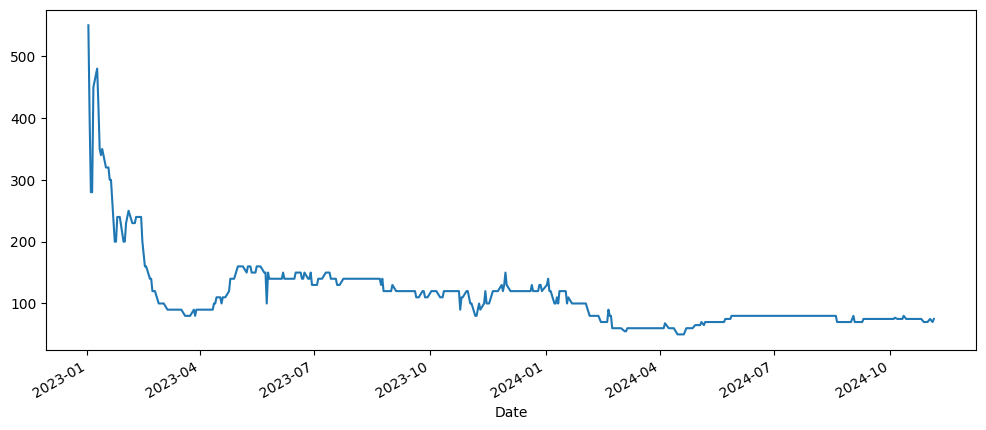

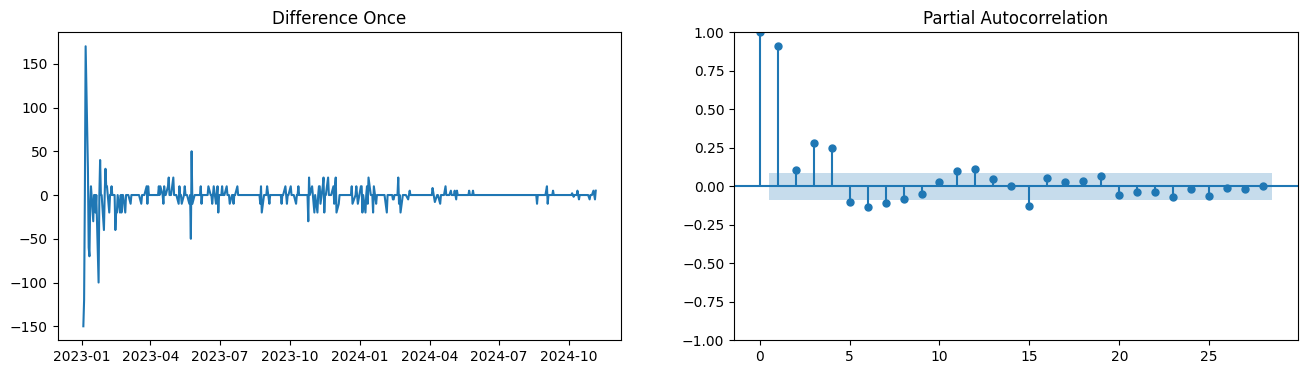

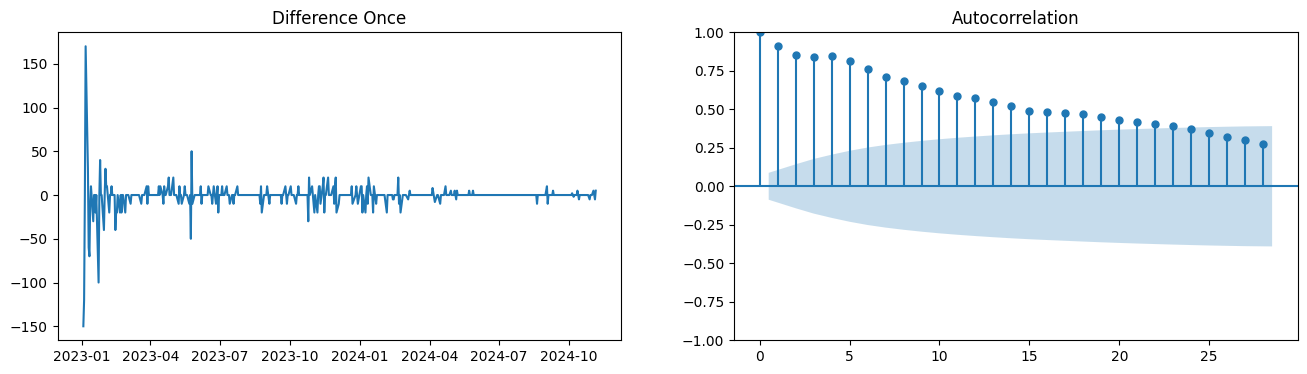

In [94]:
## MAIN: Run to choose commodity
commodity, df = gen_function()

Enter the value for p:  21
Enter the value for d:  1
Enter the value for q:  25
Do you want to proceed on training the model by:
[1] Train-Test Data
[2] Full Dataset
[0] Exit 2


D:\Programs\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Programs\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Programs\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Programs\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Programs\Py

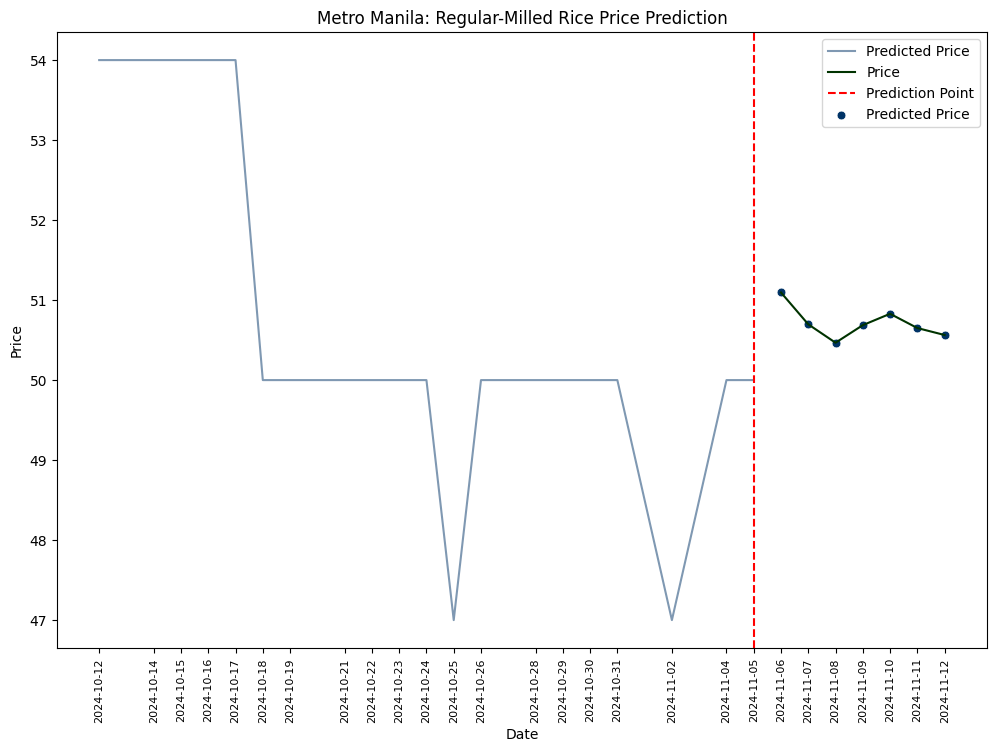

('Regular-Milled Rice',
             Low  High            Commodity  Unnamed: 4
 Date                                                  
 2023-01-02   35    40  Regular-Milled Rice         NaN
 2023-01-03   34    40  Regular-Milled Rice         NaN
 2023-01-04   34    40  Regular-Milled Rice         NaN
 2023-01-05   34    40  Regular-Milled Rice         NaN
 2023-01-06   34    40  Regular-Milled Rice         NaN
 2023-01-09   34    40  Regular-Milled Rice         NaN
 2023-01-10   34    40  Regular-Milled Rice         NaN
 2023-01-11   34    40  Regular-Milled Rice         NaN
 2023-01-12   34    40  Regular-Milled Rice         NaN
 2023-01-13   35    40  Regular-Milled Rice         NaN
 2023-01-16   34    40  Regular-Milled Rice         NaN
 2023-01-17   34    40  Regular-Milled Rice         NaN
 2023-01-18   35    40  Regular-Milled Rice         NaN
 2023-01-19   34    40  Regular-Milled Rice         NaN
 2023-01-20   34    40  Regular-Milled Rice         NaN
 2023-01-23   34    40  

In [10]:
# MAIN: Run to execute prediction
predict(commodity, df)